In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import AgglomerativeClustering


### This code is not accurate to create clusters as agglomerative clustering is unable to run the complete data set
### and will crash due to it being computationally expensive (even afer performing dimension reductions and cleaning 
### any outliers) so only a small sample of the data is used###

# Load the Spotify dataset
tracks_df = pd.read_csv("Spotify_tracks.csv")

# Select features and a smaller subset of data (e.g., first 1000 rows)
features = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", "valence"]
subset_tracks = tracks_df.head(1000)[["UID"] + features]

# Initialize Agglomerative Clustering with 4 clusters (adjust as needed)
agglomerative = AgglomerativeClustering(n_clusters=4, linkage='ward', affinity='euclidean')

# Fit and predict on the subset
labels = agglomerative.fit_predict(subset_tracks[features])

# Add cluster labels to the subset dataframe
subset_tracks['cluster_label'] = labels

# Save the subset dataframe with cluster labels
subset_tracks.to_csv("subset_tracks_with_clusters.csv", index=False)

# Load the updated data with cluster info
subset_tracks = pd.read_csv("subset_tracks_with_clusters.csv")

# Prompt the user to enter their favorite songs' ids
ids = input('Enter comma-separated ids of your favorite songs\n> ').strip().split(',')

# Trim whitespace from each ID and convert to integers
ids = [int(id.strip()) for id in ids]

# Print the entered IDs (for debugging purposes)
print("Entered IDs:", ids)

# Filter the dataframe to get the user's favorite songs
favorites = subset_tracks[subset_tracks['UID'].isin(ids)]

# Check if there are any favorite songs in the dataset
if favorites.empty:
    print("No matching songs found for the entered IDs.")
else:
    # Find out the most frequent cluster among the user's favorite songs
    agglo_clusters = favorites['cluster_label'].value_counts()
    user_favorite_agglo_cluster = agglo_clusters.idxmax()

    print('\nFavorite Agglomerative Clustering cluster:', user_favorite_agglo_cluster)

    # Get the songs that belong to the user's favorite Agglomerative Clustering cluster
    agglo_suggestions = subset_tracks[subset_tracks['cluster_label'] == user_favorite_agglo_cluster]

    # Print the first 5 song suggestions
    print("\nAgglomerative Clustering Suggestions:\n", agglo_suggestions.head(5))


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Enter comma-separated ids of your favorite songs
>  65, 89, 988


Entered IDs: [65, 89, 988]

Favorite Agglomerative Clustering cluster: 0

Agglomerative Clustering Suggestions:
    UID  acousticness  danceability  energy  instrumentalness  liveness  \
0    0        0.0322         0.676   0.461          0.000001    0.3580   
2    2        0.2100         0.438   0.359          0.000000    0.1170   
4    4        0.4690         0.618   0.443          0.000000    0.0829   
5    5        0.2890         0.688   0.481          0.000000    0.1890   
8    8        0.2940         0.625   0.414          0.000000    0.1510   

   speechiness  valence  cluster_label  
0       0.1430    0.715              0  
2       0.0557    0.120              0  
4       0.0526    0.167              0  
5       0.1050    0.666              0  
8       0.0369    0.669              0  


In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans

#KMEANS is a viable method for producing clusters as it is the least computationally expensive and is the most efficient

# Load the Spotify dataset
# Ensure the .csv file is in the correct directory or provide a full path to the file


tracks_df = pd.read_csv("Spotify_tracks.csv")
tracks_df.head()
tracks_df.describe()
tracks_df.info()

# Select only necessary features for clustering
tracks = tracks_df[["acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence"]]

# Initialize the KMeans model with 5 clusters
# We can adjust the number of clusters based on our understanding of the data
kmeans = KMeans(n_clusters=5)

# Train the model with our data
kmeans.fit(tracks)

# Add a new column 'type' to the dataframe. This column will contain the cluster number each track belongs to.
tracks_df["type"] = kmeans.labels_

tracks_df["type"]

tracks_df.shape

# Save the dataframe with cluster information as a new CSV file
tracks_df.to_csv("result.csv", index=False)

# Load the updated data with cluster info
tracks = pd.read_csv("result.csv")

tracks.head(13)

# Prompt the user to enter their favorite songs' ids
ids = input('Enter comma-separated ids of your favorite songs\n> ').strip().split(',')

#Trim whitespace from each ID and convert to integers
ids = [int(id.strip()) for id in ids]

# Print the entered IDs from the 'UID' column (for debugging purposes)
print("Entered IDs:", ids)

# Filter the dataframe to get the user's favorite songs
favorites = tracks[tracks['UID'].isin(ids)]


# Find out the most frequent cluster among the user's favorite songs
clusters = favorites['type'].value_counts()
user_favorite_cluster = clusters.idxmax()

print('\nFavorite cluster:', user_favorite_cluster, '\n')


# Get the songs that belong to the user's favorite cluster
suggestions = tracks[tracks['type'] == user_favorite_cluster]

# Print the first 5 song suggestions
suggestions.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   UID               114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Enter comma-separated ids of your favorite songs
>  3, 4, 3


Entered IDs: [3, 4, 3]

Favorite cluster: 4 



,UID,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,type
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.924,0.000006,0.1010,0.2670,77.489,4,acoustic,4
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.905,0.000071,0.1320,0.1430,181.740,3,acoustic,4
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.469,0.000000,0.0829,0.1670,119.949,4,acoustic,4
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,1,0.0355,0.857,0.000003,0.0913,0.0765,141.284,3,acoustic,4
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,1,0.0417,0.559,0.000000,0.0973,0.7120,150.960,4,acoustic,4


In [13]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


#DBSCAN is also a viable method as a clustering algorithm although its performance is less efficient than K Means
# Load the Spotify dataset
tracks_df = pd.read_csv("Spotify_tracks.csv")

# Display dataset info for verification
tracks_df.head()
tracks_df.describe()
tracks_df.info()

# Select only necessary features for clustering
tracks = tracks_df[["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", "valence"]]

# Standardize the data (using z-score normalization)
scaler = StandardScaler()
tracks_scaled = scaler.fit_transform(tracks)

# Initialize the DBSCAN model with appropriate parameters
eps = 0.5  # Example value, adjust as needed
min_samples = 15  # Example value, adjust as needed
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Train the model with our data
dbscan.fit(tracks_scaled)

# Add a new column 'type' to the dataframe. This column will contain the cluster number each track belongs to.
tracks_df["type"] = dbscan.labels_

# Save the dataframe with cluster information as a new CSV file
tracks_df.to_csv("result_dbscan.csv", index=False)

# Load the updated data with cluster info
tracks = pd.read_csv("result_dbscan.csv")

# Display the updated data
tracks.head(13)

# Prompt the user to enter their favorite songs' ids
ids = input('Enter comma-separated ids of your favorite songs\n> ').strip().split(',')

# Trim whitespace from each ID and convert to integers
ids = [int(id.strip()) for id in ids]

# Print the entered IDs from the 'UID' column (for debugging purposes)
print("Entered IDs:", ids)

# Filter the dataframe to get the user's favorite songs
favorites = tracks[tracks['UID'].isin(ids)]

# Find out the most frequent cluster among the user's favorite songs
clusters = favorites['type'].value_counts()
user_favorite_cluster = clusters.idxmax()

print('\nFavorite cluster:', user_favorite_cluster, '\n')

# Get the songs that belong to the user's favorite cluster
suggestions = tracks[tracks['type'] == user_favorite_cluster]

# Print the first 5 song suggestions
suggestions.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   UID               114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Enter comma-separated ids of your favorite songs
>  34, 67, 45, 34


Entered IDs: [34, 67, 45, 34]

Favorite cluster: 0 



,UID,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,type
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.924,0.000006,0.1010,0.267,77.489,4,acoustic,0
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.210,0.000000,0.1170,0.120,76.332,4,acoustic,0
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.905,0.000071,0.1320,0.143,181.740,3,acoustic,0
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.469,0.000000,0.0829,0.167,119.949,4,acoustic,0
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,1,0.1050,0.289,0.000000,0.1890,0.666,98.017,4,acoustic,0


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/xf/tyt6zqg54yl074r80m7k7z0h0000gn/T/ipykernel_16765/1211648897.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks_no_outliers["cluster"] = kmeans.labels_
/var/folders/xf/tyt6zqg54yl074r80m7k7z0h0000gn/T/ipykernel_16765/1211648897.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

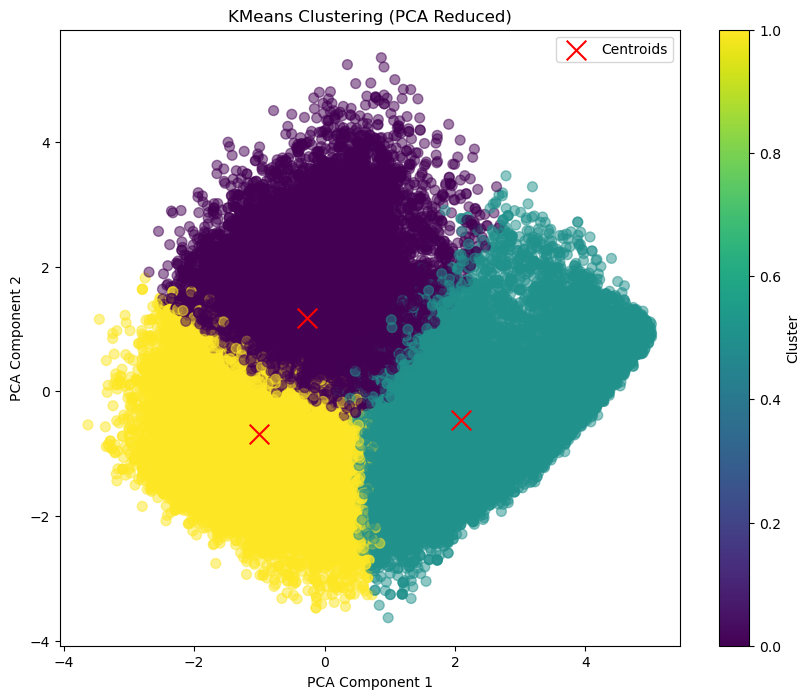


PCA Components with Cluster Labels:
       PCA1      PCA2  cluster
0 -1.191825 -0.343005        2
1  2.475146 -0.969577        1
2  1.249638  0.418588        1
3  3.307627 -0.393860        1
4  1.051499 -0.476099        1

Silhouette Score for 3 clusters:  0.1961548339456805


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Load the Spotify dataset
tracks_df = pd.read_csv("Spotify_tracks.csv")

# Select the necessary features for clustering
features = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", "valence"]
tracks = tracks_df[features]

# Handle outliers using Z-score
z_scores = np.abs((tracks - tracks.mean()) / tracks.std())
tracks_no_outliers = tracks[(z_scores < 3).all(axis=1)]

# Initialize scaler and scale the data
scaler = StandardScaler()
tracks_scaled = scaler.fit_transform(tracks_no_outliers)

# Initialize KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Train the model with scaled data
kmeans.fit(tracks_scaled)

# Add cluster labels to the original dataframe without outliers
tracks_no_outliers["cluster"] = kmeans.labels_

# Reduce data dimensions to 2 (visualization purposes)
pca = PCA(n_components=2)
tracks_pca = pca.fit_transform(tracks_scaled)

# Add PCA components to the DataFrame without outliers
tracks_no_outliers['PCA1'] = tracks_pca[:, 0]
tracks_no_outliers['PCA2'] = tracks_pca[:, 1]

# Plot the clusters based on PCA components and plot centroids
plt.figure(figsize=(10, 8))
plt.scatter(tracks_no_outliers['PCA1'], tracks_no_outliers['PCA2'], c=tracks_no_outliers['cluster'], cmap='viridis', s=50, alpha=0.5)
plt.title('KMeans Clustering (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Plot centroids
centroids = kmeans.cluster_centers_
# Transform centroids to PCA space
centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='x', s=200, color='red', label='Centroids')
plt.legend()

plt.colorbar(label='Cluster')
plt.show()

# Display PCA components and cluster labels in the dataframe
pca_df = pd.DataFrame(tracks_pca, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = kmeans.labels_

# Print the first few rows of the PCA dataframe
print("\nPCA Components with Cluster Labels:")
print(pca_df.head())

# Silhouette Analysis
silhouette_avg = silhouette_score(tracks_scaled, kmeans.labels_)
print("\nSilhouette Score for 3 clusters: ", silhouette_avg)


Silhouette Score: -0.13262852696119992


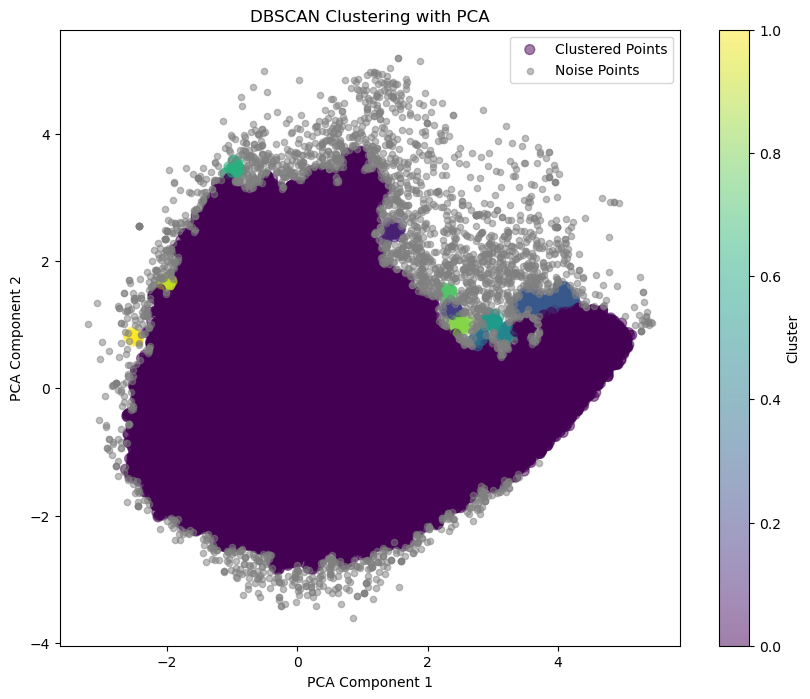

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

#DBSCAN plot visualization using PCA and handling outliers to ensure accurate visualization 

# Load the Spotify dataset
tracks_df = pd.read_csv("Spotify_tracks.csv")

# Select features for clustering
features = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", "valence"]
tracks = tracks_df[features]

# Standardize the data (using z-score normalization to handle outliers)
scaler = StandardScaler()
tracks_scaled = scaler.fit_transform(tracks)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
tracks_pca = pca.fit_transform(tracks_scaled)

# Initialize DBSCAN with adjusted parameters
eps = 0.5  # Adjust epsilon based on your data
min_samples = 15  # Adjust min_samples based on your data
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit DBSCAN on PCA-transformed data
cluster_labels = dbscan.fit_predict(tracks_pca)

# Compute silhouette score (if clusters are present)
if len(set(cluster_labels)) > 1:  # Check if there's more than one cluster
    silhouette_avg = silhouette_score(tracks_pca, cluster_labels)
    print(f"Silhouette Score: {silhouette_avg}")

# Add cluster labels to the original dataframe
tracks_df['cluster'] = cluster_labels

# Plot DBSCAN clustering result with PCA components
plt.figure(figsize=(10, 8))
# Plot points with cluster labels
plt.scatter(tracks_pca[cluster_labels != -1, 0], tracks_pca[cluster_labels != -1, 1], 
            c=cluster_labels[cluster_labels != -1], cmap='viridis', s=50, alpha=0.5, label='Clustered Points')
# Plot noise points separately (cluster label -1)
plt.scatter(tracks_pca[cluster_labels == -1, 0], tracks_pca[cluster_labels == -1, 1], 
            c='gray', s=20, alpha=0.5, label='Noise Points')
plt.title('DBSCAN Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


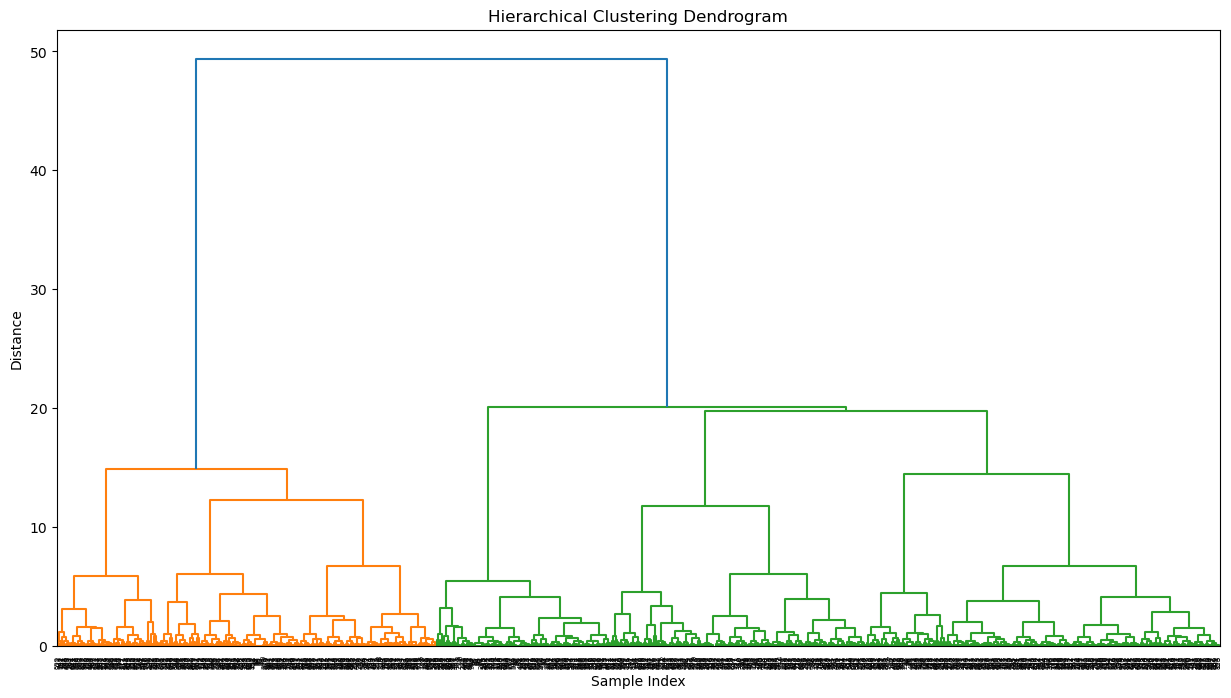

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram


#Visualization of the agglomerative clustering algorithm (clusters)

# Load your dataset (replace "your_dataset.csv" with your actual dataset file)
tracks_df = pd.read_csv("Spotify_tracks.csv")

# Select features for clustering
features = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", "valence"]
tracks = tracks_df[features]

# Handling outliers with z-score normalization
scaler = StandardScaler()
tracks_scaled = scaler.fit_transform(tracks)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
tracks_pca = pca.fit_transform(tracks_scaled)

# Take a smaller sample of your dataset for demonstration (adjust as needed)
sample_size = 1000  # Adjust sample size according to your dataset size
tracks_sample = tracks_pca[:sample_size, :]

# Initialize Agglomerative Clustering with desired parameters
n_clusters = 3  # Number of clusters
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the model and predict cluster labels
cluster_labels = agglomerative.fit_predict(tracks_sample)

# Plotting the clusters using dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    from scipy.cluster.hierarchy import linkage, dendrogram
    linkage_matrix = linkage(tracks_sample, 'ward')  # You can use other linkage methods as well
    plt.figure(figsize=(15, 8))
    plt.title('Hierarchical Clustering Dendrogram')
    dendrogram(linkage_matrix, **kwargs)
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

# Plot the dendrogram for agglomerative clustering
plot_dendrogram(agglomerative)
